In [1]:
using Megafauna
using DelimitedFiles
using CairoMakie
includet("../src/SegmentDistances.jl")

enumerating change points
number of dimensions: 1


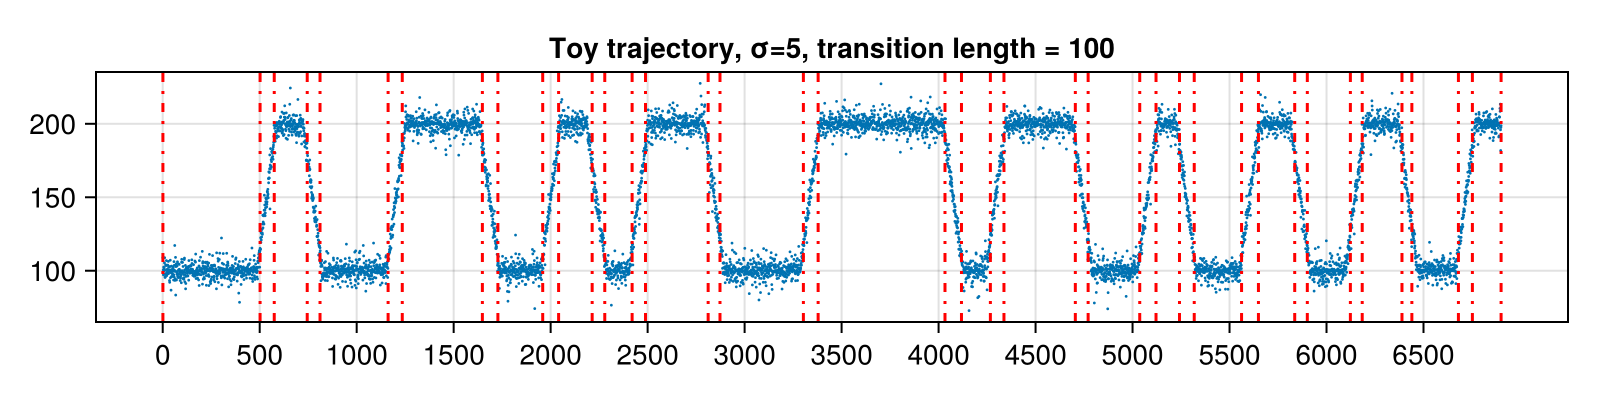

In [2]:
X = readdlm("../data/Toy_Model_Trajectories/sigma_5_transition_100.txt")
q = 0.5
w = 100
changes = compute_change_points(X, 0.5, 100)
f = Figure(size=(800,200))
ax = Axis(f[1,1], title="Toy trajectory, σ=5, transition length = 100")
ax.xticks=0:500:length(X)
scatter!(ax, 1:length(X), X[:,1],markersize=2)
vlines!(ax, changes, color=:red, linestyle=:dashdot)
f

In [3]:
D = pairwise_segment_distances_1d(X, changes)
open("cs-and-ds/toy_changes-$(q)-$(w).txt", "w") do io
        writedlm(io, changes)
end
open("cs-and-ds/toy_dists-$(q)-$(w).txt", "w") do io
        writedlm(io, D)
end

Number of segments = 39
Computing 741 segment distances


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


finished computing distances


enumerating change points
number of dimensions: 1


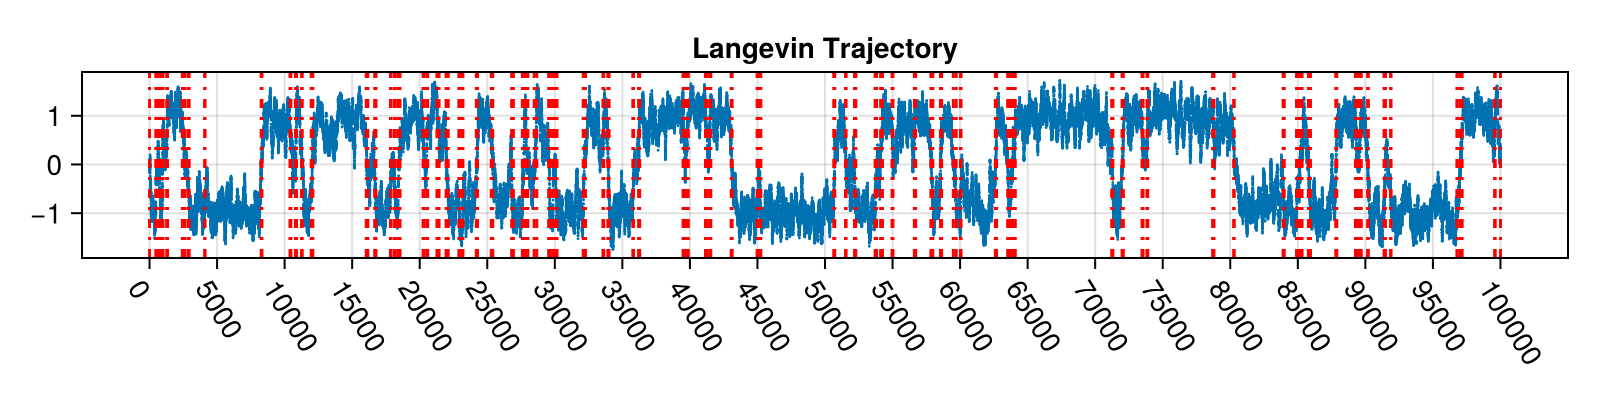

In [4]:
X = readdlm("../data/Langevin/langevin.txt")
w = 0.85
q = 225
changes = compute_change_points(X, 0.85, 225)
f = Figure(size=(800,200))
ax = Axis(f[1,1], title="Langevin Trajectory")
ax.xticks=0:5000:length(X)
ax.xtickformat="{:.0f}"
ax.xticklabelrotation=-45.0
scatter!(ax, 1:length(X), X[:,1],markersize=2)
vlines!(ax, changes, color=:red, linestyle=:dashdot)
f

In [5]:
D = pairwise_segment_distances_1d(X, changes)
open("cs-and-ds/langevin_changes-$(q)-$(w).txt", "w") do io
        writedlm(io, changes)
end
open("cs-and-ds/langevin_dists-$(q)-$(w).txt", "w") do io
        writedlm(io, D)
end

Number of segments = 161
Computing 12880 segment distances


Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


finished computing distances


enumerating change points
number of dimensions: 1


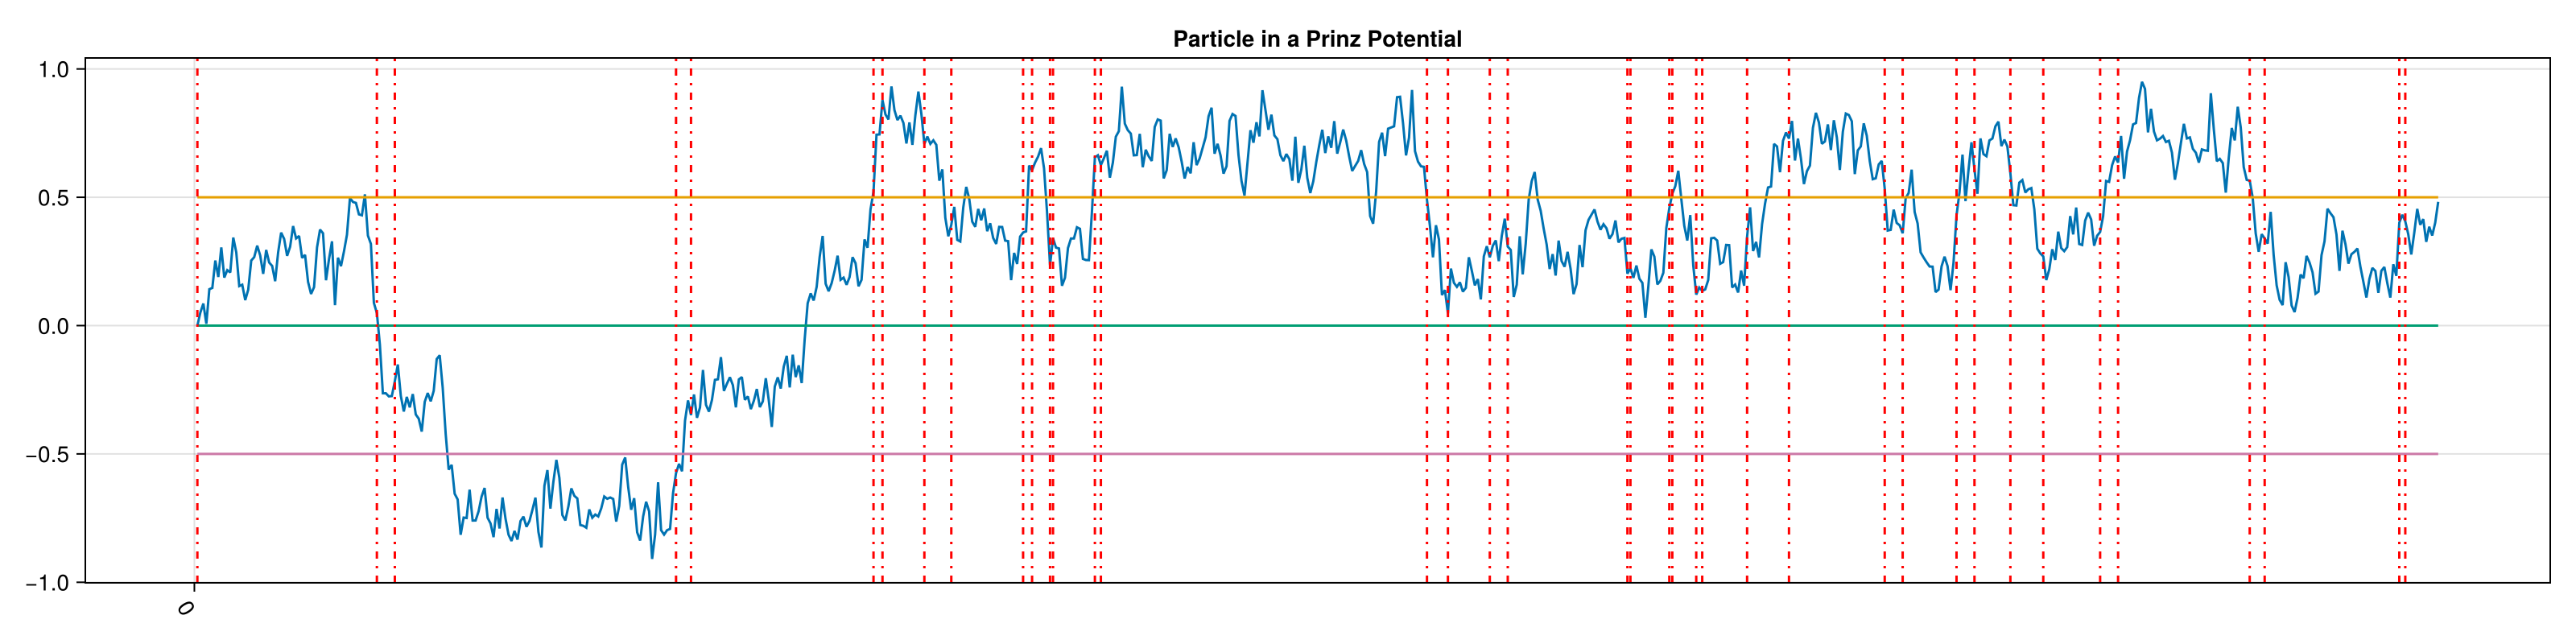

In [22]:
X = readdlm("../data/prinz/prinz-potential.txt")
q = 0.25
w = 90
changes = compute_change_points(X, 0.5, 16)
f = Figure(size=(1600,400))
ax = Axis(f[1,1], title="Particle in a Prinz Potential")
ax.xticks=0:5000:length(X)
ax.xtickformat="{:.0f}"
ax.xticklabelrotation=-45.0
T = 750
S = findfirst(x -> x > T, changes) - 1
lines!(ax, 1:T, X[1:T,1])#,markersize=10)
lines!(ax, 1:T, 0.5 * ones(T))
lines!(ax, 1:T, zeros(T))
lines!(ax, 1:T, -0.5 * ones(T))
vlines!(ax, changes[1:S], color=:red, linestyle=:dashdot)
f

In [7]:
D = pairwise_segment_distances_1d(X, changes)
open("cs-and-ds/prinz_changes-$(q)-$(w).txt", "w") do io
        writedlm(io, changes)
end
open("cs-and-ds/prinz_dists-$(q)-$(w).txt", "w") do io
        writedlm(io, D)
end

Number of segments = 5247
Computing 13762881 segment distances


Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


finished computing distances
